# **Khám phá dữ liệu UCI Diabetes theo thời gian**

## **Giới thiệu**

Phân tích khám phá dữ liệu được thực hiện trên bộ dữ liệu theo dõi bệnh tiểu đường, bao gồm các thông tin về thời gian, loại chỉ số (Code), và giá trị đo lường (Value). Dữ liệu được thu thập từ nhiều file nhỏ, mỗi file chứa các bản ghi theo định dạng chuỗi thời gian.

### **Nguồn dữ liệu**

Thiết bị điện tử: ghi dữ liệu với dấu thời gian thực tế (timestamp).

Hồ sơ giấy: chỉ có các mốc thời gian logic (ví dụ: ăn sáng, ăn trưa, ăn tối, đi ngủ).

Gán giờ cố định:
- Ăn sáng → 08:00
- Ăn trưa → 12:00
- Ăn tối → 18:00
- Đi ngủ → 22:00
    
=> Như vậy, hồ sơ giấy sử dụng thời gian giả định, còn thiết bị điện tử cung cấp thời gian thực tế.

### **Cấu trúc tập tin**

Mỗi bản ghi có 4 trường, được phân cách bằng dấu tab, mỗi dòng là một bản ghi:
- Date (Ngày) – ngày ghi nhận; định dạng MM-DD-YYYY
- Time (Giờ) – giờ ghi nhận; định dạng HH:MM
- Code (Mã) – mã loại chỉ số 
- Value (Giá trị) – giá trị đo lường

### **Phân tích dữ liệu ban đầu**

Cách thực hiện: Sử dụng các thư viện mạnh mẽ của Python

In [102]:
# import thư viện pandas, và các module cần thiết khác
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

### **Định nghĩa code**

| Code | Ý nghĩa |
|------|---------|
| 33   | Liều insulin Regular |
| 34   | Liều insulin NPH |
| 35   | Liều insulin UltraLente |
| 48   | Đo glucose (không xác định) |
| 57   | Đo glucose (không xác định) |
| 58   | Đo glucose trước bữa sáng |
| 59   | Đo glucose sau bữa sáng |
| 60   | Đo glucose trước bữa trưa |
| 61   | Đo glucose sau bữa trưa |
| 62   | Đo glucose trước bữa tối |
| 63   | Đo glucose sau bữa tối |
| 64   | Đo glucose trước bữa phụ (snack) |
| 65   | Triệu chứng hạ đường huyết |
| 66   | Ăn uống bình thường |
| 67   | Ăn nhiều hơn bình thường |
| 68   | Ăn ít hơn bình thường |
| 69   | Vận động bình thường |
| 70   | Vận động nhiều hơn bình thường |
| 71   | Vận động ít hơn bình thường |
| 72   | Sự kiện đặc biệt (không xác định) |

## **Load dataset**

In [52]:
# Đường dẫn tới thư mục chứa các file
path = r"D:\Github\Data_Analysis_SGU_2025\Data_analysis\practice\lab3\file\diabetes-data\diabetes-data"

# Lấy tất cả các file bắt đầu bằng 'data-' và loại bỏ 'Data-Codes'
files = glob.glob(path + r"\data-*")
files = [f for f in files if os.path.basename(f).lower() != "data-codes"]

df_list = []
for file in files:
    try:
        df = pd.read_csv(file, sep="\t", header=None, names=["Date", "Time", "Code", "Value"])
        df_list.append(df)
    except Exception as e:
        print(f"Lỗi khi đọc file: {file}")
        print(e)

# Gộp lại nếu có ít nhất một file đọc thành công
if df_list:
    df = pd.concat(df_list, ignore_index=True)
    print("Đọc dữ liệu thành công! Số dòng:", len(df))
else:
    print("Không có file nào được đọc thành công.")

Đọc dữ liệu thành công! Số dòng: 29330


In [35]:
df

,Date,Time,Code,Value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7
...,...,...,...,...
29325,05-09-1989,08:00,33,1.0
29326,05-09-1989,08:00,34,7.0
29327,05-10-1989,08:00,34,7.0
29328,05-11-1989,08:00,34,7.0


In [18]:
# # Kiểm tra kích thước của DataFrame: số dòng và số cột
df.shape

(29330, 4)

In [31]:
# Hiển thị 5 dòng đầu tiên của DataFrame
df.head()

,Date,Time,Code,Value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7


In [20]:
# Hiển thị 10 dòng đầu tiên của DataFrame
df.head(10)

,Date,Time,Code,Value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7
5,04-21-1991,22:51,48,123
6,04-22-1991,7:35,58,216
7,04-22-1991,7:35,33,10
8,04-22-1991,7:35,34,13
9,04-22-1991,13:40,33,2


**Các loại biến**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29330 entries, 0 to 29329
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    29297 non-null  object
 1   Time    29330 non-null  object
 2   Code    29330 non-null  int64 
 3   Value   29297 non-null  object
dtypes: int64(1), object(3)
memory usage: 916.7+ KB


**Kiểm tra các giá trị null/NA**

In [22]:
df.isnull().sum()

Date     33
Time      0
Code      0
Value    33
dtype: int64

**Thống kê của các mã Code**

In [23]:
# Hiển thị thống kê mô tả cho các cột số trong DataFrame
df.describe()

,Code
count,29330.000000
mean,46.428606
std,13.453219
min,0.000000
25%,33.000000
50%,48.000000
75%,60.000000
max,72.000000


Kết luận về thống kê của các mã Code: 

- Tổng số mã Code ghi nhận (count): 29,330 dòng dữ liệu.

- Giá trị trung bình (mean) của mã Code: khoảng 46.43, cho thấy phần lớn các mã nằm trong nhóm theo dõi glucose và insulin.

- Độ lệch chuẩn (std): khoảng 13.45, phản ánh mức độ phân tán của các mã quanh giá trị trung bình.

- Giá trị nhỏ nhất (min): 0 => có thể là mã đặc biệt hoặc lỗi nhập liệu.

- Phân vị thứ nhất (25%): 33.0

- Trung vị (50%): 48.0

- Phân vị thứ ba (75%): 60.0 => Các phân vị này cho thấy phần lớn dữ liệu tập trung quanh các mã phổ biến như insulin (33–35) và đo glucose (58–64).

- Giá trị lớn nhất (max): 72 => nằm trong nhóm mã hành vi hoặc sự kiện đặc biệt.

**Phân bố các mã Code trong dữ liệu trước tiền xử lý**

In [24]:
df['Code'].value_counts()

Code
33    9518
34    3830
58    3518
62    3160
60    2771
48    1883
35    1053
57     990
64     904
65     331
67     326
63     219
66     154
70     139
56     119
71      98
72      94
69      68
61      66
68      34
0       33
59      20
4        1
36       1
Name: count, dtype: int64

Kết luận về kết quả phân bố các mã Code trong dữ liệu:

- Mã 33 (Liều insulin Regular) xuất hiện nhiều nhất, cho thấy đây là loại insulin được sử dụng phổ biến trong quá trình điều trị.

- Các mã đo glucose như 62 (sau bữa trưa), 58 (không xác định), 64 (sau bữa tối), và 60 (sau bữa ăn) cũng có tần suất cao, phản ánh việc theo dõi đường huyết thường xuyên theo thời điểm trong ngày.

- Các mã hành vi và sự kiện như 71 (triệu chứng hạ đường huyết), 72 (ăn uống bình thường), và 76 (vận động nhiều hơn bình thường) xuất hiện ít hơn, cho thấy đây là các tình huống đặc biệt hoặc ít gặp.

## **Tiền xử lý dữ liệu**

In [ ]:
# Chuyển Date + Time thành datetime, set index
df["Datetime"] = pd.to_datetime(df["Date"].astype(str).str.strip() + " " + df["Time"].astype(str).str.strip(), errors="coerce")

# Loại bỏ các dòng lỗi (Datetime bị NaT)
df = df.dropna(subset=["Datetime"])

# Xóa cột Date và Time gốc
df = df.drop(columns=["Date", "Time"])

# Đặt Datetime làm index và sắp xếp theo thời gian
df = df.set_index("Datetime").sort_index()

# Kiểm tra kết quả
print("Đọc dữ liệu thành công! Số dòng:", len(df))
df.info()
df.head(5)

Đọc dữ liệu thành công! Số dòng: 29285
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29285 entries, 1988-03-27 08:00:00 to 1991-09-23 21:10:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Code    29285 non-null  int64 
 1   Value   29252 non-null  object
dtypes: int64(1), object(1)
memory usage: 686.4+ KB


,Code,Value
Datetime,,
1988-03-27 08:00:00,34,20
1988-03-27 08:00:00,58,134
1988-03-27 12:00:00,60,158
1988-03-27 18:00:00,62,258
1988-03-28 08:00:00,34,20


In [ ]:
# Thống kê dữ liệu
print("Số lượng record:", len(df))
print("Missing values:\n", df.isna().sum())
print("Duplicate records:", df.duplicated().sum())

Số lượng record: 29285
Missing values:
 Code      0
Value    33
dtype: int64
Duplicate records: 26194


In [71]:
# Pivot table: mỗi Code thành 1 cột, value là giá trị

# Reset index để pivot dùng được
df_reset = df.reset_index()

# Kiểm tra cột Value có tồn tại và đúng kiểu
if "Value" in df_reset.columns:
    df_reset["Value"] = pd.to_numeric(df_reset["Value"], errors="coerce")
else:
    print("Không tìm thấy cột 'Value' trong df_reset.")
    raise SystemExit()

# Loại bỏ các dòng có Value bị lỗi (NaN)
df_reset = df_reset.dropna(subset=["Value"])

# Kiểm tra lại số dòng còn lại
print("Số dòng còn lại sau xử lý:", len(df_reset))
print("Các kiểu dữ liệu:")
print(df_reset.dtypes)

# Pivot table: mỗi Code thành một cột, dùng mean để gộp nếu trùng
pivot_df = df_reset.pivot_table(index="Datetime", columns="Code", values="Value", aggfunc="mean")

# Kiểm tra kết quả
print("Kích thước pivot_df:", pivot_df.shape)
print("Số ô có dữ liệu:", pivot_df.count().sum())
print('----------------------------------')
print(pivot_df.head())


Số dòng còn lại sau xử lý: 29244
Các kiểu dữ liệu:
Datetime    datetime64[ns]
Code                 int64
Value              float64
dtype: object
Kích thước pivot_df: (14740, 23)
Số ô có dữ liệu: 24047
----------------------------------
Code                 4   33    34  35  36  48  56  57     58  59  ...  63  64  \
Datetime                                                          ...           
1988-03-27 08:00:00 NaN NaN  20.0 NaN NaN NaN NaN NaN  134.0 NaN  ... NaN NaN   
1988-03-27 12:00:00 NaN NaN   NaN NaN NaN NaN NaN NaN    NaN NaN  ... NaN NaN   
1988-03-27 18:00:00 NaN NaN   NaN NaN NaN NaN NaN NaN    NaN NaN  ... NaN NaN   
1988-03-28 08:00:00 NaN NaN  20.0 NaN NaN NaN NaN NaN  115.0 NaN  ... NaN NaN   
1988-03-28 12:00:00 NaN NaN   NaN NaN NaN NaN NaN NaN    NaN NaN  ... NaN NaN   

Code                 65  66  67  68  69  70  71  72  
Datetime                                             
1988-03-27 08:00:00 NaN NaN NaN NaN NaN NaN NaN NaN  
1988-03-27 12:00:00 NaN NaN NaN N

**Phân bố các mã Code trong dữ liệu sau tiền xử lý**

In [88]:
coverage = pivot_df.count().sort_values(ascending=False)
print(coverage)

Code
33    7634
34    3279
58    2888
62    2501
60    2196
48    1453
35     990
57     904
64     750
65     292
67     278
63     195
66     152
70     114
56      97
71      81
72      72
69      64
61      60
68      29
59      16
36       1
4        1
dtype: int64


## **EDA trực quan**

### **Biến động các chỉ số theo thời gian**

#### Nhóm Code dày dữ liệu - phù hợp để tìm trend (xu hướng) & seasonality (chu kỳ)

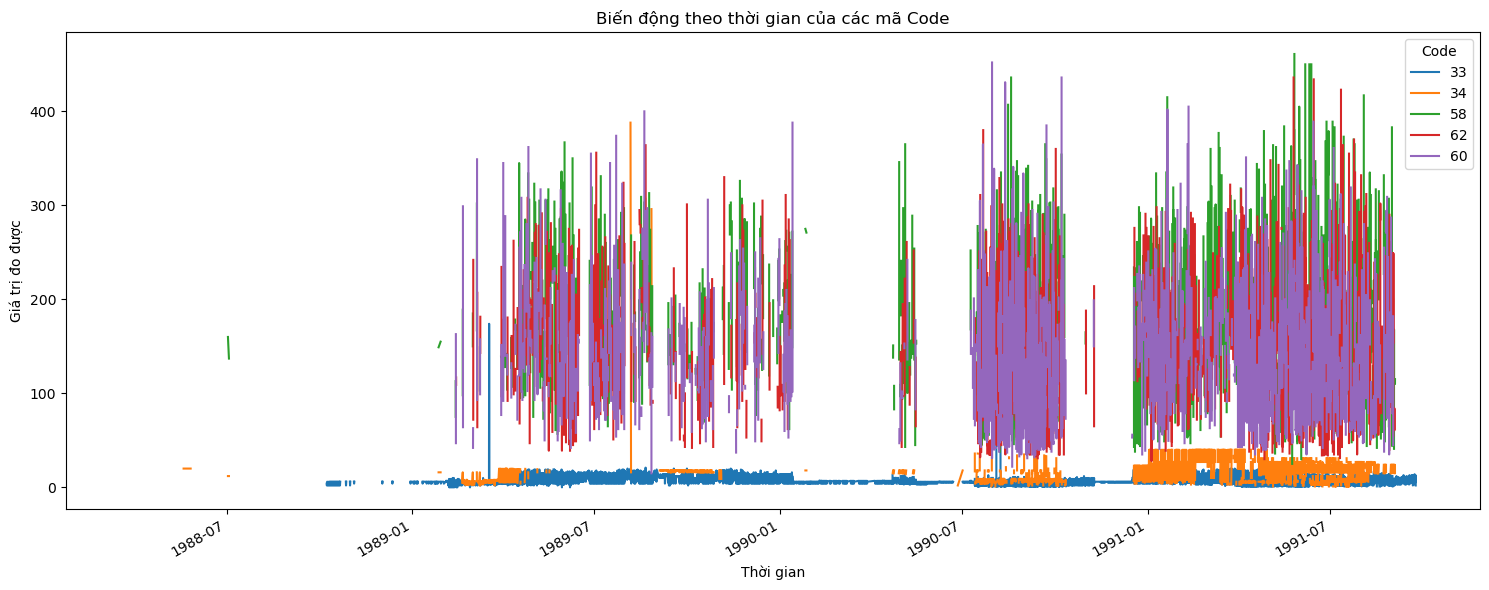

In [97]:
pivot_df[[33, 34, 58, 62, 60]].dropna(how="all").plot(figsize=(15, 6))
plt.title("Biến động theo thời gian của các mã Code")
plt.xlabel("Thời gian")
plt.ylabel("Giá trị đo được")
plt.legend(title="Code")
plt.tight_layout()
plt.show()

Nhận xét: Biểu đồ cho thấy các mã Code biến động mạnh theo từng giai đoạn, đặc biệt từ năm 1989 trở đi. Trong khi Code 33 và 34 có giá trị thấp và khá ổn định, thì các mã 58, 60 và 62 dao động lớn, nhiều thời điểm vượt mức 400, phản ánh mức độ rủi ro cao hơn. Dữ liệu cũng có những khoảng trống, cho thấy sự gián đoạn trong quá trình thu thập.

#### Nhóm Code vừa phải - phù hợp để tìm spikes (điểm bất thường)

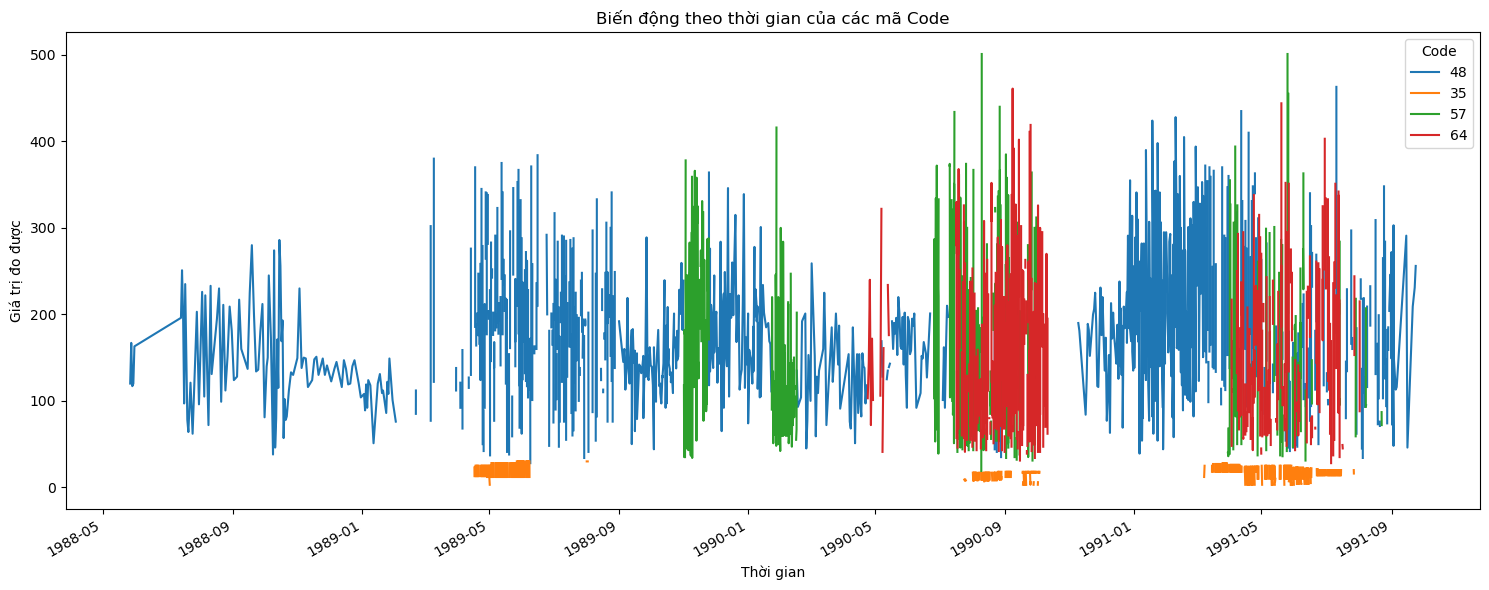

In [98]:
pivot_df[[48, 35, 57, 64]].dropna(how="all").plot(figsize=(15, 6))
plt.title("Biến động theo thời gian của các mã Code")
plt.xlabel("Thời gian")
plt.ylabel("Giá trị đo được")
plt.legend(title="Code")
plt.tight_layout()
plt.show()

Nhận xét: Biểu đồ cho thấy giá trị các mã Code có sự biến động rõ rệt theo thời gian. Trong đó, Code 48 xuất hiện liên tục với biên độ dao động rộng và giữ vai trò nổi bật nhất. Ngược lại, Code 35 thường dao động ở mức rất thấp, tập trung gần sát trục hoành. Các mã 57 và 64 lại có những giai đoạn bùng phát mạnh, nhiều thời điểm vượt trên 400, cho thấy tính bất ổn cao. Bên cạnh đó, dữ liệu cũng có những khoảng trống, phản ánh sự gián đoạn trong việc ghi nhận. Nhìn chung, Code 48 có xu hướng ổn định hơn so với 57 và 64, trong khi Code 35 khá nhỏ và ít biến động.

### **Tính summary statistics: mean, median, min, max theo Code**

| **Chỉ số** | **Ý nghĩa đơn giản**     | **Dùng để làm gì?**                      | **Giải nghĩa chi tiết** |
|------------|--------------------------|------------------------------------------|--------------------------|
| Mean       | Trung bình cộng          | Nhìn tổng thể dữ liệu                    | Tổng tất cả các giá trị chia cho số lượng quan sát |
| Median     | Giá trị giữa             | Tránh bị ảnh hưởng bởi outlier           | Là giá trị nằm giữa khi sắp xếp dữ liệu từ nhỏ đến lớn |
| Min        | Nhỏ nhất                 | Biết mức thấp nhất                       | Là giá trị nhỏ nhất trong tập dữ liệu |
| Max        | Lớn nhất                 | Biết mức cao nhất                        | Là giá trị lớn nhất trong tập dữ liệu |

#### Thống kê tổng quan theo từng mã Code

In [104]:
summary_stats = df_reset.groupby("Code")["Value"].agg(["mean", "median", "min", "max"]).round(2)
print("Thống kê tổng quan theo mã Code:")
print(summary_stats)

Thống kê tổng quan theo mã Code:
        mean  median   min    max
Code                             
4       0.00     0.0   0.0    0.0
33      6.61     6.0   0.0  344.0
34     15.38    15.0   1.0  388.0
35     15.86    15.0   3.0   30.0
36      5.00     5.0   5.0    5.0
48    171.12   160.0  28.0  487.0
56    150.82   130.0  31.0  501.0
57    160.29   142.0  19.0  501.0
58    170.68   161.0  23.0  461.0
59    178.35   190.5  49.0  339.0
60    143.56   134.0  15.0  452.0
61    244.52   225.0  25.0  476.0
62    156.37   147.0  28.0  450.0
63    186.15   183.0  37.0  413.0
64    148.77   125.0   0.0  461.0
65      0.00     0.0   0.0    0.0
66      0.00     0.0   0.0    0.0
67      0.00     0.0   0.0    0.0
68      0.00     0.0   0.0    0.0
69      0.00     0.0   0.0    0.0
70      0.00     0.0   0.0    0.0
71      0.00     0.0   0.0    0.0
72      0.00     0.0   0.0    0.0


#### Vẽ biểu đồ cột để trực quan hóa giá trị trung bình

<Axes: title={'center': 'Giá trị trung bình theo mã Code'}, xlabel='Code'>

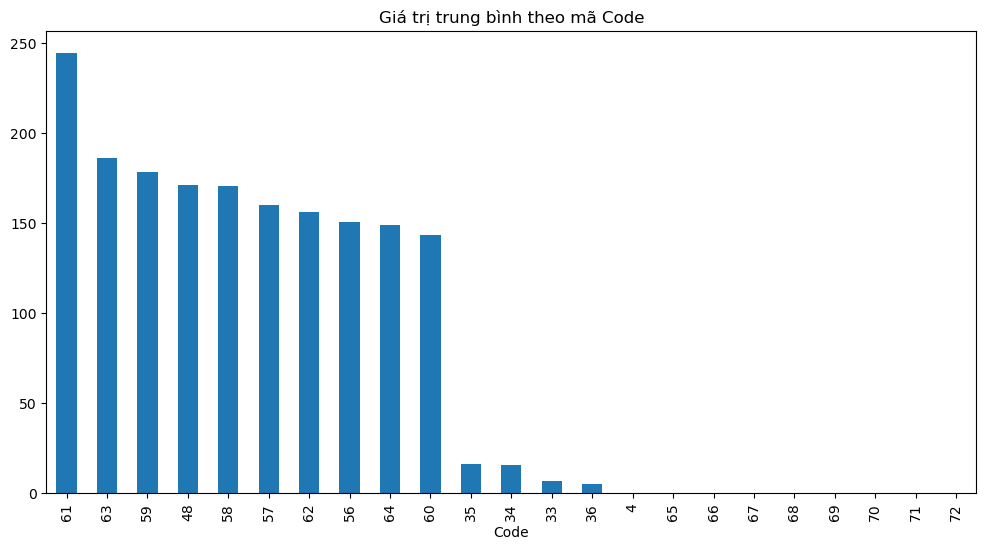

In [105]:
summary_stats["mean"].sort_values(ascending=False).plot(kind="bar", figsize=(12, 6), title="Giá trị trung bình theo mã Code")

Nhận xét: Kết quả cho thấy Code 61 có giá trị trung bình cao nhất, vượt trội so với các mã khác. Nhóm các mã 48, 58, 57, 62, 59, 63 dao động ở mức trung bình khá cao (150–190), trong khi các mã 33–36 có giá trị rất thấp và ít biến động. Các mã còn lại hầu như không có dữ liệu.

#### Kiểm tra mã Code có giá trị bất thường

In [108]:
# Mã có giá trị max cao bất thường là mã có biến động mạnh hoặc đo sai
outlier_codes = summary_stats[summary_stats["max"] > summary_stats["mean"] * 5]
print("Mã Code có giá trị max vượt xa trung bình:")
print(outlier_codes)

Mã Code có giá trị max vượt xa trung bình:
       mean  median  min    max
Code                           
33     6.61     6.0  0.0  344.0
34    15.38    15.0  1.0  388.0


#### Vẽ biểu đồ hộp (boxplot) để thấy phân bố và phát hiện outlier hoặc spikes

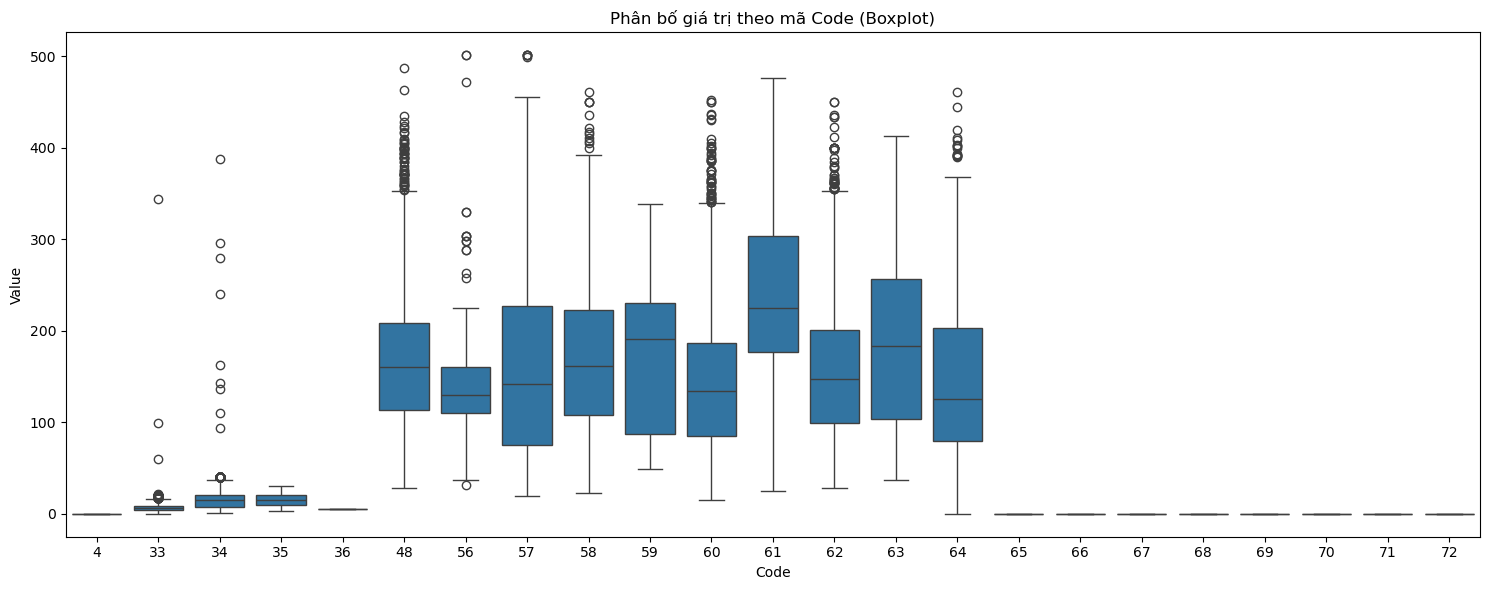

In [106]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_reset, x="Code", y="Value")
plt.title("Phân bố giá trị theo mã Code (Boxplot)")
plt.tight_layout()
plt.show()

Nhận xét: Biểu đồ Boxplot cho thấy sự khác biệt rõ rệt giữa các mã Code. Nhóm mã 33–36 có giá trị nhỏ, phân bố hẹp và ít biến động. Trong khi đó, các mã 48, 57, 58, 59, 61, 62 và 63 có giá trị trải rộng, trung vị cao và xuất hiện nhiều điểm ngoại lai, phản ánh mức độ dao động mạnh. Riêng Code 61 nổi bật với trung vị cao nhất và phạm vi biến thiên lớn, trong khi các mã từ 65 trở đi gần như không có dữ liệu.

### **Xu hướng dài hạn qua trung bình trượt (Rolling Mean)**

#### Tính rolling mean của nhóm Code dày nhất

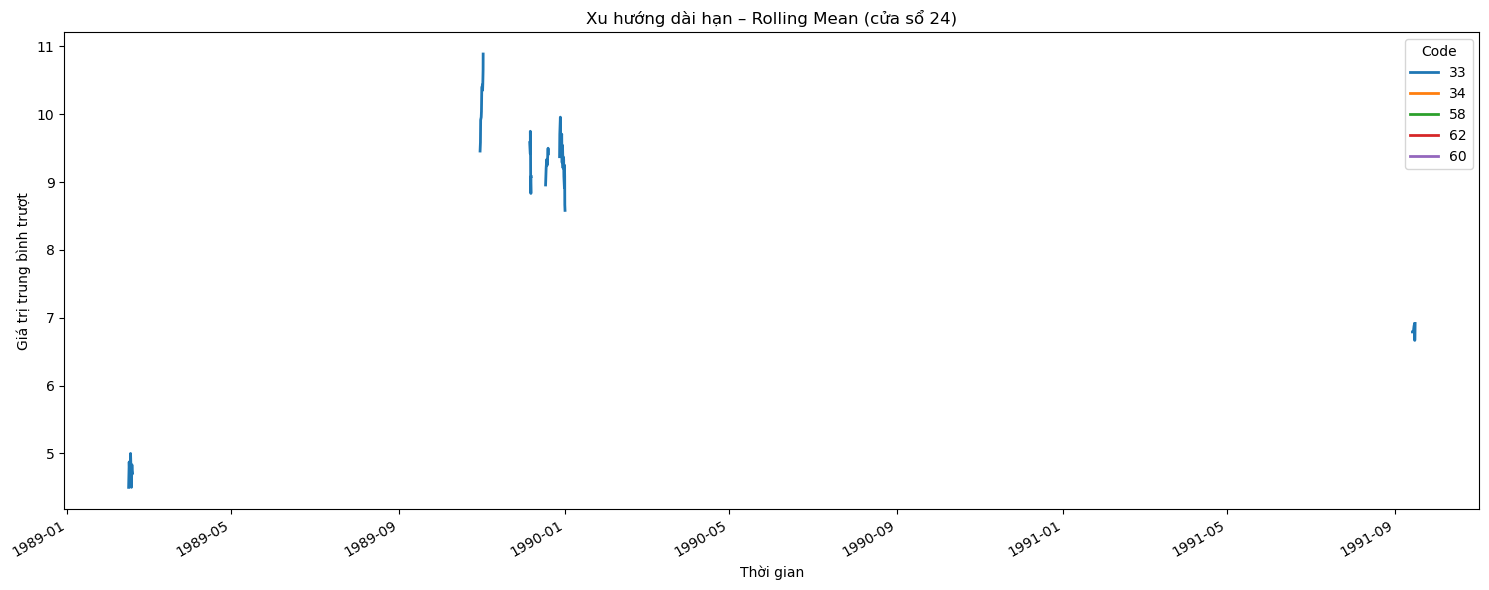

In [ ]:
# Rolling Mean – làm mượt dữ liệu theo cửa sổ thời gian
# Tính rolling mean với window = 24 (ví dụ: 24 giờ nếu dữ liệu theo giờ)
rolling_df = pivot_df[[33, 34, 58, 62, 60]].rolling(window=24).mean()

# Vẽ biểu đồ rolling mean
rolling_df.plot(figsize=(15, 6), linewidth=2)
plt.title("Xu hướng dài hạn – Rolling Mean (cửa sổ 24)")
plt.xlabel("Thời gian")
plt.ylabel("Giá trị trung bình trượt")
plt.legend(title="Code")
plt.tight_layout()
plt.show()

Nhận xét: Biểu đồ Rolling Mean cho thấy chỉ có Code 33 xuất hiện xu hướng rõ rệt. Giá trị trung bình trượt của mã này dao động từ khoảng 5 đến 11, phản ánh sự tăng giảm theo từng giai đoạn, sau đó duy trì quanh mức 7. Các mã khác gần như không có dữ liệu đủ để thể hiện xu hướng dài hạn.

#### So sánh dữ liệu gốc và rolling mean để phát hiện trend (xu hướng) rõ hơn

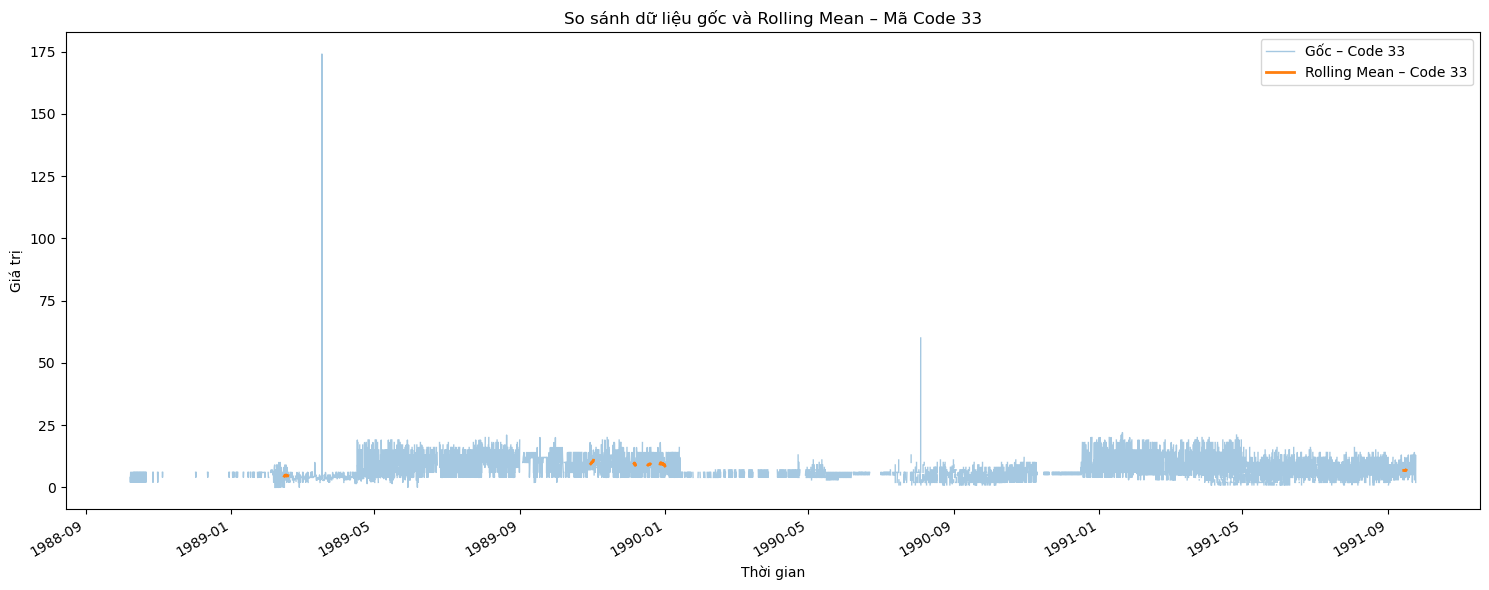

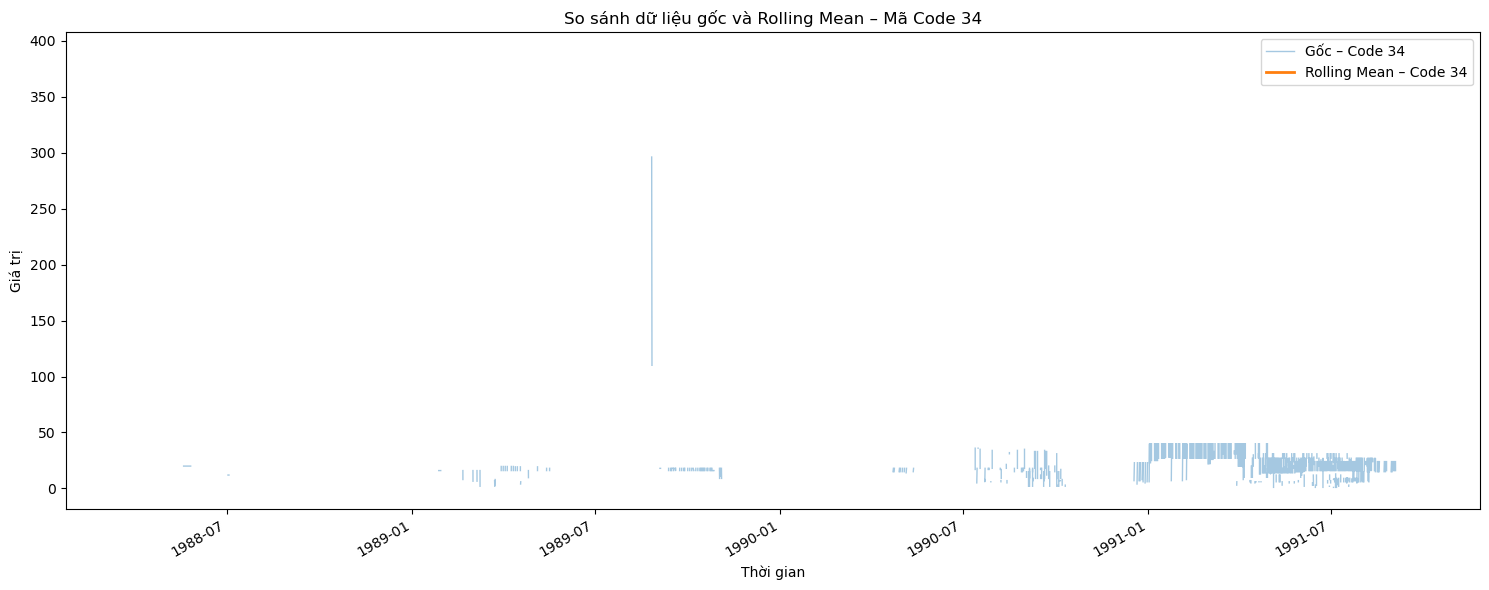

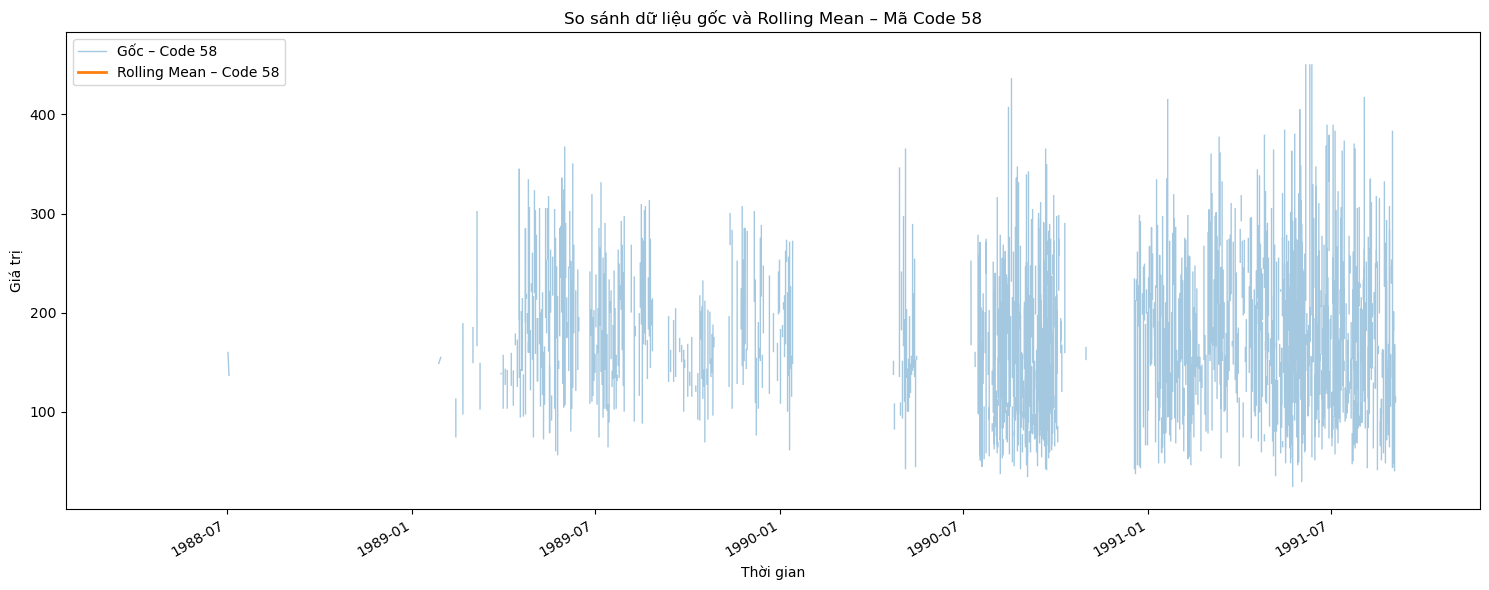

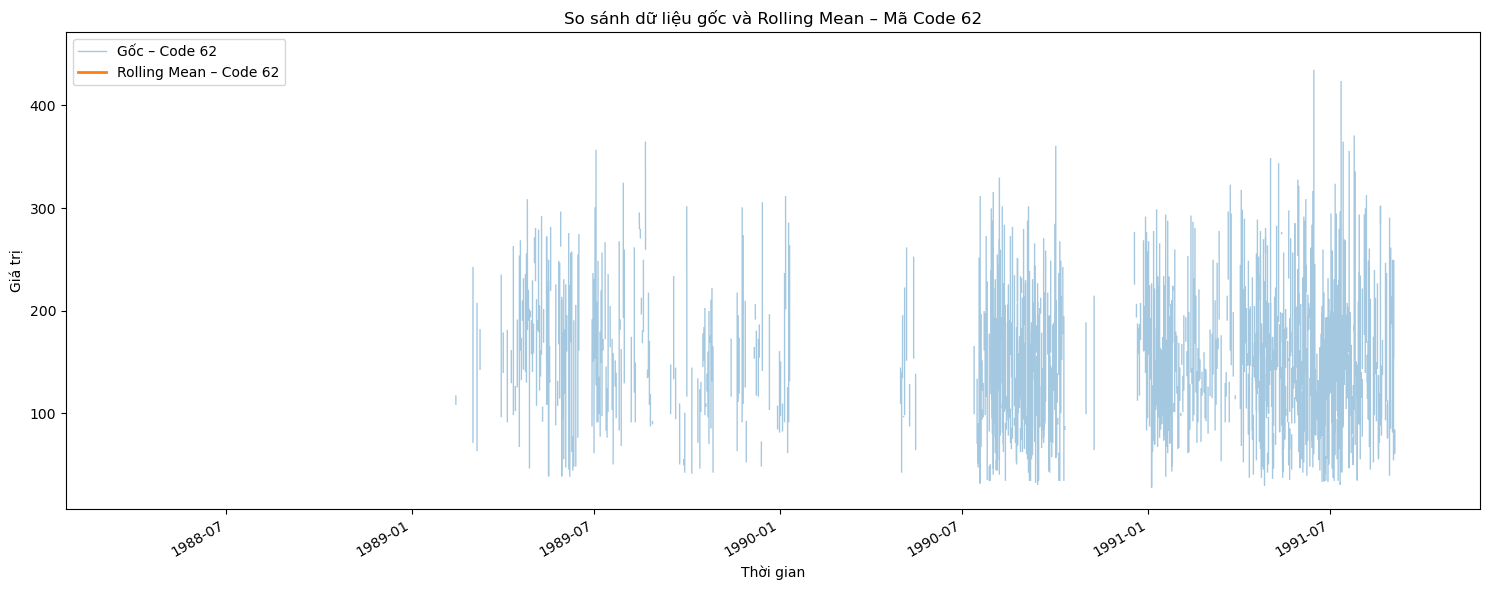

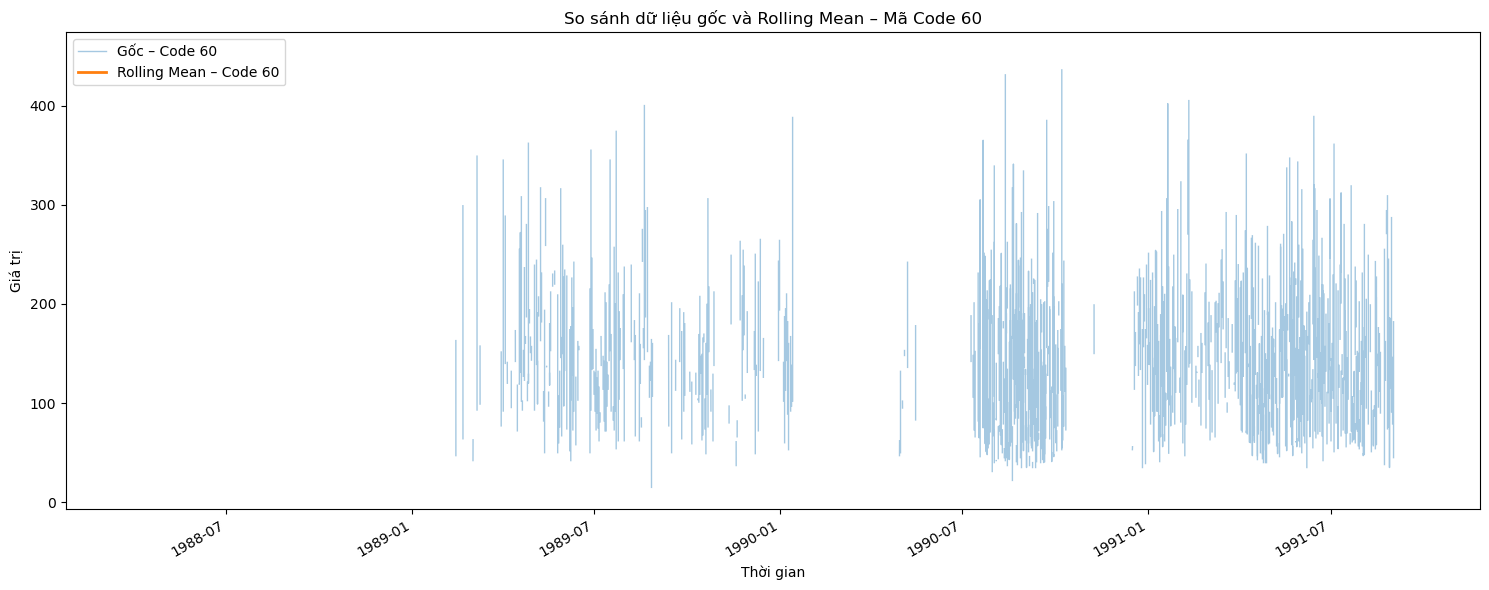

In [125]:
# Danh sách mã Code cần so sánh
codes_to_compare = [33, 34, 58, 62, 60]

# Tính rolling mean
rolling_df = pivot_df[codes_to_compare].rolling(window=24).mean()

# Vẽ biểu đồ kết hợp cho từng mã
for code in codes_to_compare:
    plt.figure(figsize=(15, 6))

    # Dữ liệu gốc
    pivot_df[code].plot(label=f"Gốc – Code {code}", alpha=0.4, linewidth=1)

    # Rolling mean
    rolling_df[code].plot(label=f"Rolling Mean – Code {code}", linewidth=2)

    plt.title(f"So sánh dữ liệu gốc và Rolling Mean – Mã Code {code}")
    plt.xlabel("Thời gian")
    plt.ylabel("Giá trị")
    plt.legend()
    plt.tight_layout()
    plt.show()


Nhận xét: Trong quá trình phân tích bốn mã Code 33, 34, 60 và 62, có thể nhận thấy rằng Code 33 và 34 có biên độ dao động nhỏ hơn và phần lớn giá trị duy trì ở mức thấp, mặc dù đôi khi vẫn xuất hiện những điểm bất thường với giá trị cao đột biến. Ngược lại, Code 60 và 62 lại thể hiện mức độ biến động mạnh hơn với dữ liệu dày đặc và thường xuyên xuất hiện giá trị lớn, thậm chí có thời điểm vượt quá 400. Tuy nhiên, khi áp dụng Rolling Mean, xu hướng trung bình của cả bốn mã đều cho thấy sự ổn định theo thời gian thay vì thể hiện sự tăng hoặc giảm rõ rệt. Như vậy, Rolling Mean đóng vai trò quan trọng trong việc làm mượt dữ liệu, loại bỏ nhiễu và giúp làm nổi bật xu hướng tổng thể, từ đó mang lại cái nhìn toàn diện và chính xác hơn so với việc chỉ quan sát dữ liệu gốc vốn chịu ảnh hưởng nhiều bởi dao động ngắn hạn.

#### Xu hướng dài hạn qua EMA

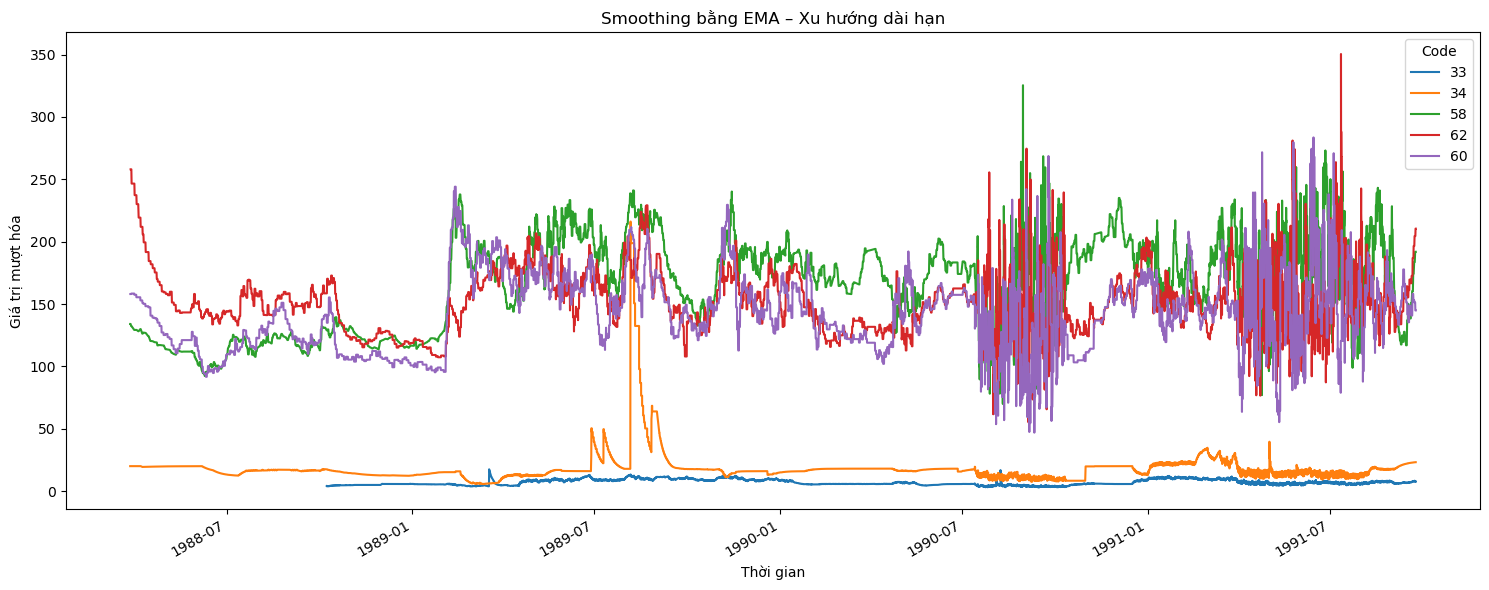

In [122]:
# span = 24 nếu dữ liệu theo giờ
ema_df = pivot_df[[33, 34, 58, 62, 60]].ewm(span=24, adjust=False).mean()
ema_df.plot(figsize=(15, 6))
plt.title("Smoothing bằng EMA – Xu hướng dài hạn")
plt.xlabel("Thời gian")
plt.ylabel("Giá trị mượt hóa")
plt.legend(title="Code")
plt.tight_layout()
plt.show()

Nhận xét: Trong giai đoạn quan sát, Code 33 và 34 duy trì ở mức thấp và biến động nhẹ, thể hiện sự ổn định hơn so với các mã còn lại. Trái lại, Code 58, 60 và 62 có giá trị cao hơn và dao động mạnh hơn, đặc biệt giai đoạn sau năm 1989, khi cả ba mã này thường xuyên xuất hiện biến động phức tạp với nhiều đỉnh tăng giảm. Tuy nhiên, nhờ EMA, có thể nhận thấy rằng dù dữ liệu gốc rất nhiễu, xu hướng tổng thể của các mã vẫn xoay quanh một mức trung bình ổn định, không có dấu hiệu tăng trưởng hay suy giảm rõ rệt trong dài hạn.

#### So sánh dữ liệu gốc và EMA để phát hiện trend (xu hướng) rõ hơn

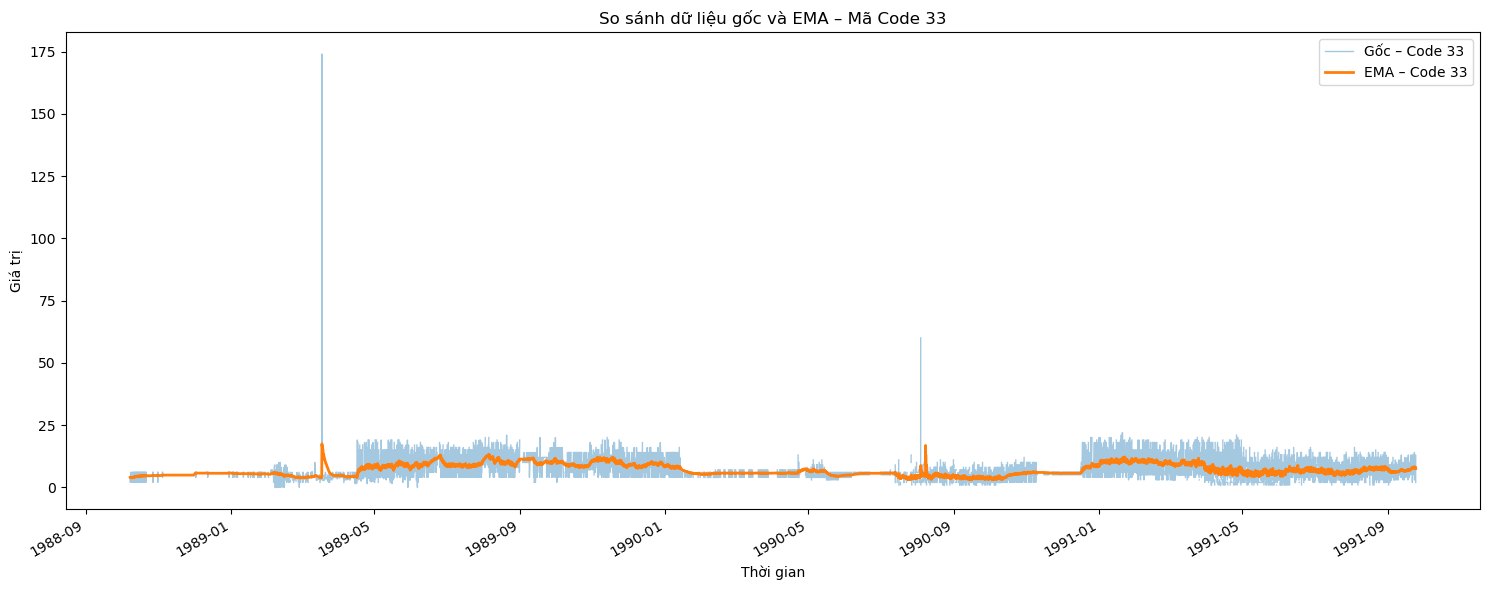

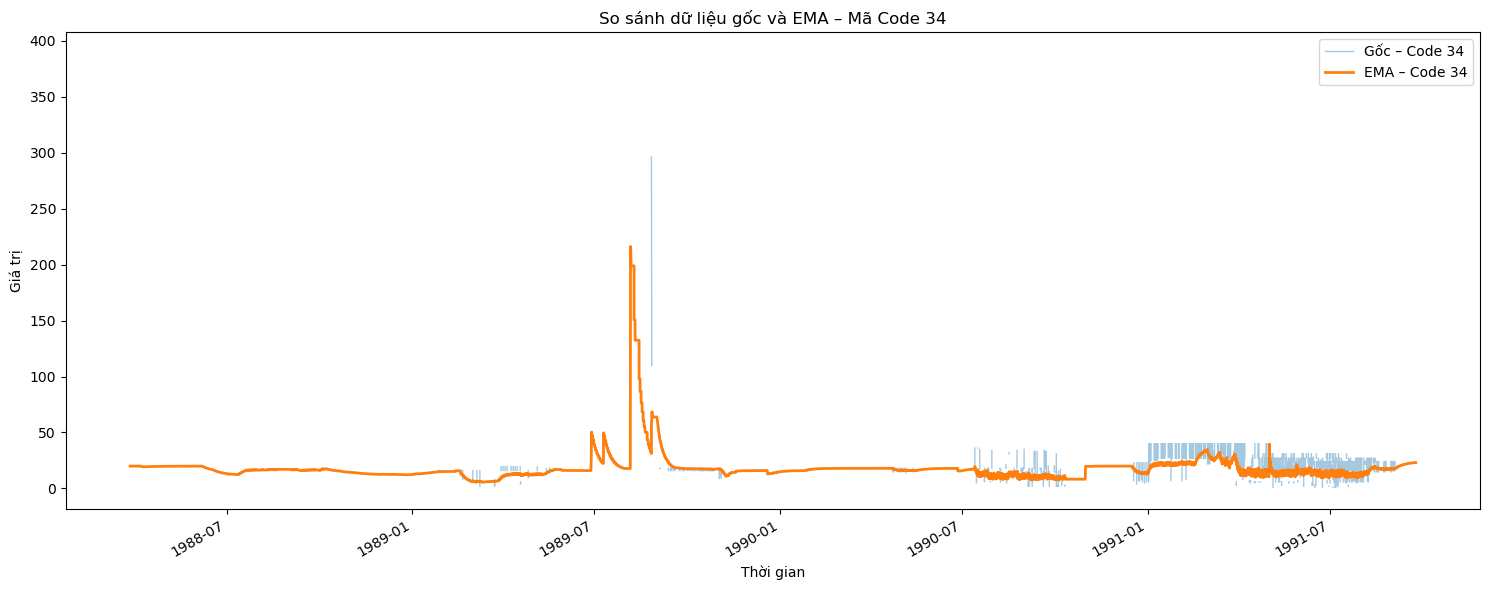

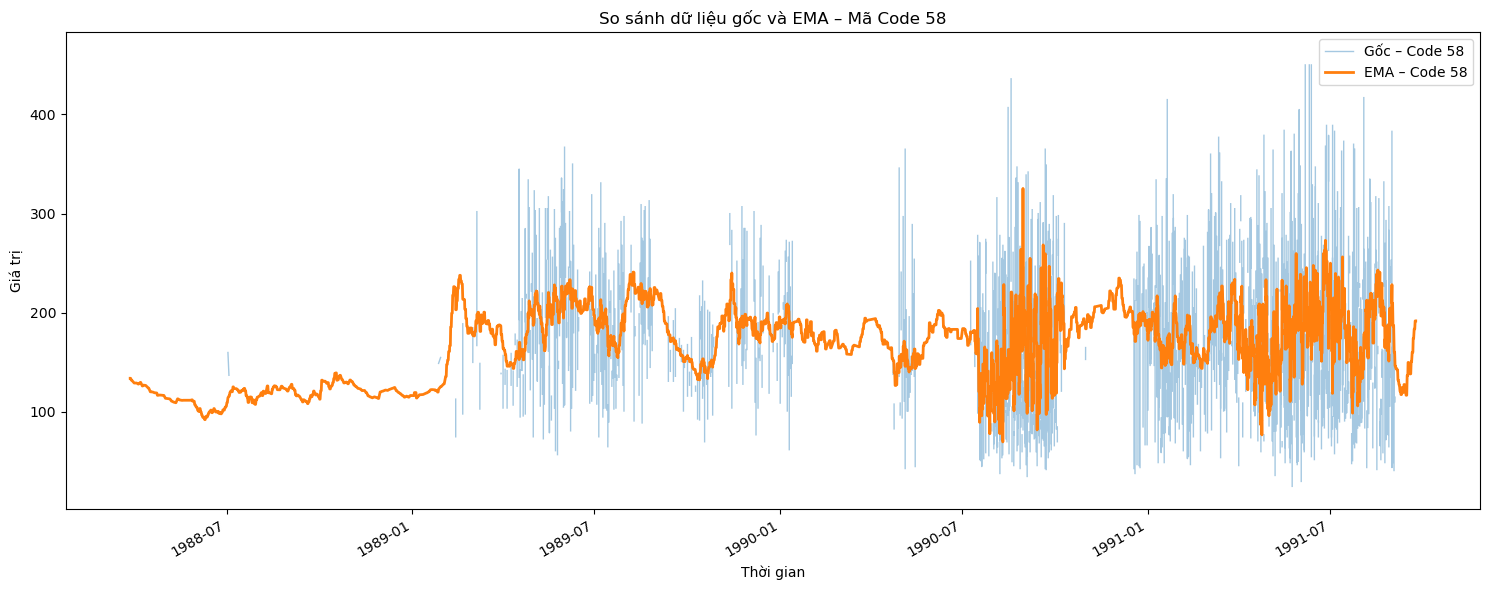

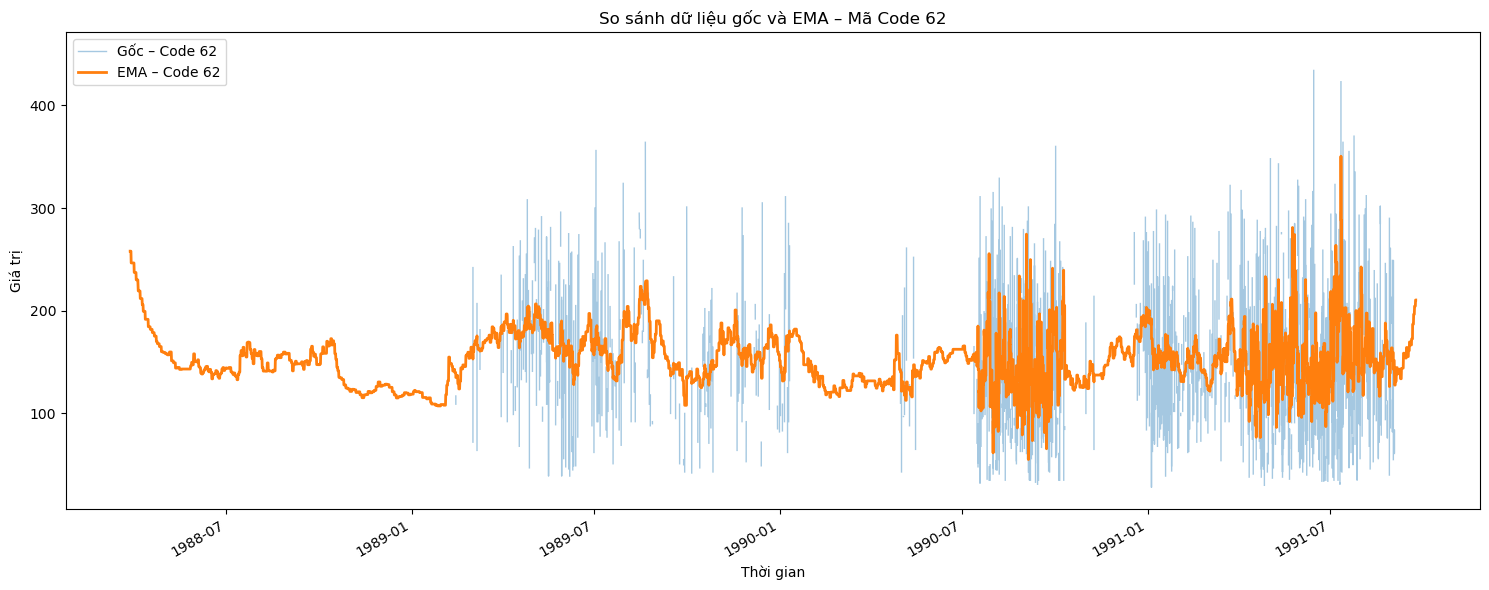

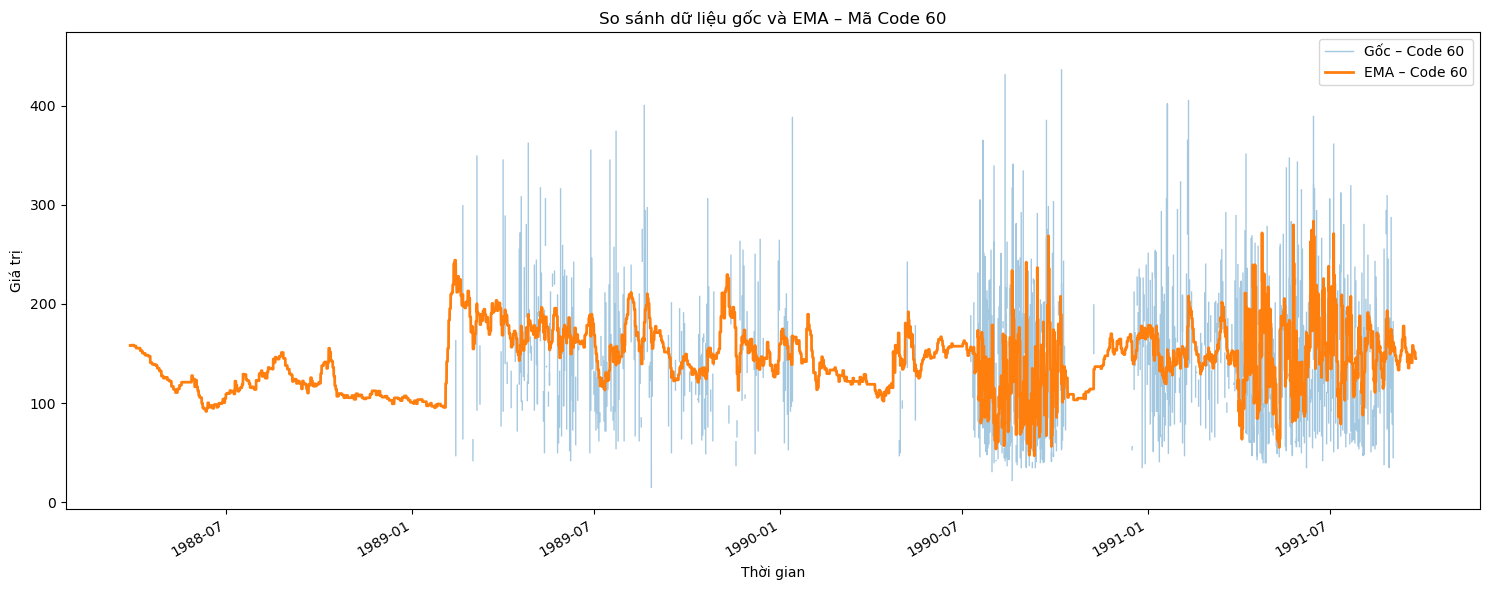

In [123]:
for code in [33, 34, 58, 62, 60]:
    plt.figure(figsize=(15, 6))
    pivot_df[code].plot(label=f"Gốc – Code {code}", alpha=0.4, linewidth=1)
    ema_df[code].plot(label=f"EMA – Code {code}", linewidth=2)
    plt.title(f"So sánh dữ liệu gốc và EMA – Mã Code {code}")
    plt.xlabel("Thời gian")
    plt.ylabel("Giá trị")
    plt.legend()
    plt.tight_layout()
    plt.show()


Nhận xét: Từ các biểu đồ so sánh dữ liệu gốc và dữ liệu sau khi làm mượt bằng EMA cho các mã 33, 34, 58, 62 và 60 có thể rút ra kết luận rằng phương pháp EMA đã giúp giảm đáng kể nhiễu ngẫu nhiên, nhờ đó xu hướng chính trở nên rõ ràng hơn. Đối với các mã 33 và 34, dữ liệu gốc biến động mạnh với nhiều điểm bất thường, tuy nhiên EMA đã làm phẳng và giữ được xu thế tổng quát. Với các mã 58, 62 và 60, dù dữ liệu gốc có biên độ dao động lớn và dày đặc, nhưng đường EMA vẫn duy trì sự ổn định, phản ánh được diễn biến dài hạn. Như vậy, EMA không chỉ hỗ trợ lọc bỏ nhiễu mà còn mang lại cái nhìn trực quan, giúp phân tích xu hướng trở nên hiệu quả và đáng tin cậy hơn.

## **Kết luận**

- Nhóm mã Code 33 và 34 (liều insulin Regular và NPH) duy trì ở mức thấp, ít dao động và thể hiện sự ổn định rõ rệt. Đây là nhóm có xu hướng dễ nhận diện nhất khi áp dụng các kỹ thuật làm mượt như Rolling Mean và EMA.
- Các mã đo glucose như 58, 60, 62, 57, 64 có biên độ dao động lớn, nhiều thời điểm vượt ngưỡng 400, phản ánh mức độ rủi ro cao hơn và sự bất ổn trong quá trình theo dõi. Đặc biệt, các biến động này thường xuất hiện sau năm 1989, cho thấy có thể liên quan đến thay đổi trong hành vi bệnh nhân hoặc quy trình đo lường.
- Code 48 xuất hiện liên tục với độ phủ cao, đóng vai trò nổi bật trong chuỗi thời gian, trong khi Code 35 và các mã từ 65 trở đi hầu như không có dữ liệu hoặc dao động rất thấp.
- Các biểu đồ Boxplot cho thấy sự khác biệt rõ rệt giữa các nhóm mã: nhóm insulin có phân bố hẹp, còn nhóm glucose có phân bố rộng và nhiều điểm ngoại lai, đặc biệt là Code 61 với trung vị cao nhất và phạm vi biến thiên lớn.
- Dữ liệu Đa Dạng: Bộ dữ liệu về bệnh tiểu đường cung cấp thông tin phong phú về glucose và insulin, cho thấy sự quan trọng trong việc quản lý sức khỏe bệnh nhân.
- Tần Suất Cao của Mã Code: Các mã liên quan đến insulin và glucose chiếm tần suất cao, với giá trị trung bình khoảng 46.43.

=> Các kỹ thuật làm mượt như Rolling Mean và EMA đã giúp làm rõ xu hướng dài hạn trong dữ liệu y sinh, đặc biệt là với các mã insulin và glucose. Nhóm mã 33–34 thể hiện sự ổn định, trong khi các mã glucose như 58, 60, 62 có mức độ biến động cao, phản ánh rủi ro lâm sàng tiềm ẩn. Dữ liệu cũng cho thấy sự gián đoạn trong thu thập, đòi hỏi kiểm tra chất lượng trước khi phân tích sâu hơn.